In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# train data loading
# 이미지 - 배열 변환후 csv로 출력
for n in range(10):
    print(n)
    df = list()
    for i in range(n*625, (n+1)*625):
        # data loading & resize
        dog_img = Image.open(f'../data/dogs-vs-cats/train/dog.{i}.jpg').resize((150,150))
        cat_img = Image.open(f'../data/dogs-vs-cats/train/cat.{i}.jpg').resize((150,150))

        # 흑백변환
        dog_img = np.mean(dog_img, axis=2, keepdims=True, dtype=np.int32).astype(np.float32)
        cat_img = np.mean(cat_img, axis=2, keepdims=True, dtype=np.int32).astype(np.float32)

        df.append([1] + dog_img.ravel().tolist())
        df.append([0] + cat_img.ravel().tolist())

    df = pd.DataFrame(df)
    df.to_csv(f'../data/dogs-vs-cats/batch{n}.csv', index=False)
    del df

In [2]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [3]:
# learning
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_list = list()
for n in range(9):
    # data load
    df = pd.read_csv(f'../data/dogs-vs-cats/batch{n}.csv')
    # data shuffle
    df = df.sample(frac=1).reset_index(drop=True).values
    
    # x, t data split
    x_data = df[:,1:].copy()
    t_data = df[:,0].copy()
    del df
    
    # normalization
    x_data = x_data % 255
    
    # reshape
    x_data = x_data.reshape(-1, 150, 150, 1)
    
    print(f'{n+1}번째 학습 시작')
    history_list.append(model.fit(x_data, t_data, 
                        epochs=20, verbose=1, validation_split=0.3))
    print(f'{n+1}번째 학습 종료')
    del x_data
    del t_data

1번째 학습 시작
Epoch 1/20
28/28 [==============================] - 1s 40ms/step - loss: 5.9297 - accuracy: 0.5211 - val_loss: 1.0459 - val_accuracy: 0.5227
Epoch 2/20
28/28 [==============================] - 1s 27ms/step - loss: 1.0065 - accuracy: 0.5577 - val_loss: 0.6866 - val_accuracy: 0.6133
Epoch 3/20
28/28 [==============================] - 1s 27ms/step - loss: 0.6882 - accuracy: 0.6400 - val_loss: 0.6822 - val_accuracy: 0.5973
Epoch 4/20
28/28 [==============================] - 1s 27ms/step - loss: 0.6170 - accuracy: 0.6640 - val_loss: 0.6434 - val_accuracy: 0.6267
Epoch 5/20
28/28 [==============================] - 1s 27ms/step - loss: 0.5334 - accuracy: 0.7074 - val_loss: 0.6617 - val_accuracy: 0.6320
Epoch 6/20
28/28 [==============================] - 1s 27ms/step - loss: 0.4989 - accuracy: 0.7520 - val_loss: 0.6622 - val_accuracy: 0.6613
Epoch 7/20
28/28 [==============================] - 1s 27ms/step - loss: 0.4401 - accuracy: 0.7989 - val_loss: 0.6874 - val_accuracy: 0.6533
Epo

28/28 [==============================] - 1s 27ms/step - loss: 0.0340 - accuracy: 0.9977 - val_loss: 1.0259 - val_accuracy: 0.7067
Epoch 14/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0357 - accuracy: 0.9931 - val_loss: 0.9414 - val_accuracy: 0.6960
Epoch 15/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0344 - accuracy: 0.9954 - val_loss: 0.9742 - val_accuracy: 0.7360
Epoch 16/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0757 - accuracy: 0.9714 - val_loss: 0.9070 - val_accuracy: 0.6853
Epoch 17/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0344 - accuracy: 0.9966 - val_loss: 0.9721 - val_accuracy: 0.7013
Epoch 18/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0196 - accuracy: 0.9977 - val_loss: 1.0275 - val_accuracy: 0.7253
Epoch 19/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 1.0369 - val_accuracy: 0.7120
Epoch 20/20
28/28 

Epoch 7/20
28/28 [==============================] - 1s 27ms/step - loss: 0.1236 - accuracy: 0.9543 - val_loss: 0.6910 - val_accuracy: 0.7333
Epoch 8/20
28/28 [==============================] - 1s 27ms/step - loss: 0.1041 - accuracy: 0.9646 - val_loss: 0.6615 - val_accuracy: 0.7547
Epoch 9/20
28/28 [==============================] - 1s 28ms/step - loss: 0.0833 - accuracy: 0.9783 - val_loss: 0.7334 - val_accuracy: 0.7467
Epoch 10/20
28/28 [==============================] - 1s 28ms/step - loss: 0.0884 - accuracy: 0.9771 - val_loss: 0.6865 - val_accuracy: 0.7680
Epoch 11/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0509 - accuracy: 0.9829 - val_loss: 0.8335 - val_accuracy: 0.7573
Epoch 12/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0465 - accuracy: 0.9886 - val_loss: 0.7781 - val_accuracy: 0.7627
Epoch 13/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0242 - accuracy: 0.9977 - val_loss: 0.8497 - val_accuracy: 0.7653
Epoch 14/

28/28 [==============================] - 1s 27ms/step - loss: 0.4532 - accuracy: 0.7874 - val_loss: 0.6031 - val_accuracy: 0.7120
Epoch 3/20
28/28 [==============================] - 1s 29ms/step - loss: 0.2958 - accuracy: 0.8731 - val_loss: 0.5678 - val_accuracy: 0.7253
Epoch 4/20
28/28 [==============================] - 1s 27ms/step - loss: 0.2042 - accuracy: 0.9120 - val_loss: 0.6333 - val_accuracy: 0.7360
Epoch 5/20
28/28 [==============================] - 1s 27ms/step - loss: 0.1537 - accuracy: 0.9463 - val_loss: 0.7166 - val_accuracy: 0.7440
Epoch 6/20
28/28 [==============================] - 1s 27ms/step - loss: 0.1192 - accuracy: 0.9680 - val_loss: 0.7833 - val_accuracy: 0.7093
Epoch 7/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0810 - accuracy: 0.9817 - val_loss: 0.7283 - val_accuracy: 0.7227
Epoch 8/20
28/28 [==============================] - 1s 27ms/step - loss: 0.0373 - accuracy: 0.9920 - val_loss: 0.7757 - val_accuracy: 0.7227
Epoch 9/20
28/28 [======

In [6]:
acc_list = list()
for history in history_list:
    acc = np.mean(history.history['val_accuracy'])
    print(acc)
    acc_list.append(acc)

print(f'Total Accuracy : {np.mean(acc_list)}')

0.6573333323001862
0.6636000007390976
0.6945333331823349
0.7150666654109955
0.7036000043153763
0.7494666635990143
0.6986666649580002
0.753600001335144
0.7277333319187165
Total Accuracy : 0.7070666664176517


In [8]:
test_df = pd.read_csv(f'../data/dogs-vs-cats/batch9.csv').values

# x, t data split
x_data = test_df[:,1:].copy()
t_data = test_df[:,0].copy()

# normalization
x_data = x_data % 255

# reshape
x_data = x_data.reshape(-1, 150, 150, 1)

reuslt = model.evaluate(x_data, t_data)

40/40 [==============================] - 0s 10ms/step - loss: 1.0116 - accuracy: 0.7512


In [9]:
print(reuslt)

[1.011593222618103, 0.7512000203132629]


In [48]:
import cv2

# 임의의 사진으로 예측하기
# 이미지 url을 이용해 예측을 진행하고 예측결과와 실제결과 출력
def predict_img(url):
    # 이미지 가져오기
    my_img = cv2.imread(url, cv2.IMREAD_COLOR)
    # 흑백으로 변환
    img_grey = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    img_grey = cv2.resize(img_grey, (150, 150), interpolation=cv2.INTER_CUBIC)
    # 반전
    img_grey = 255 - np.array(img_grey)
    
    # 예측용 데이터 생성
    x_data = img_grey.reshape(1, 150, 150, 1)
    x_data = x_data / 255
    
    # 예측 결과
    result = model.predict(x_data)
    
    # 임의의 index 번호에 대한 실제 데이터 그림
    plt.imshow(x_data.reshape(150,150), cmap='Greys')
    plt.title('Actual Value')
    plt.show()
    
    # 임의 index 번호에 대한 예측 결과
    print('Predict Value : {}'.format(result))

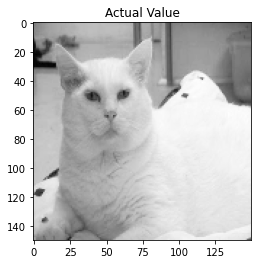

Predict Value : [[0.47854704]]


In [54]:
img_url = '../data/dogs-vs-cats/test1/123.jpg'
predict_img(img_url)

In [ ]:
# data shuffle test

df = pd.read_csv('../data/dogs-vs-cats/batch0.csv')
df = df.sample(frac=1).reset_index(drop=True).values

# x, t data split
x_data = df[:,1:].copy()
t_data = df[:,0].copy()

In [ ]:
%reset
# 일부 이미지 분리(총 4000개)

import os, shutil

original_dataset_dir = '../data/dogs-vs-cats/train'

## directory 생성 ##

base_dir = '../data/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

## file 복사 ##

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)